# Feature Sets

**Learning Objective**: Create a minimal set of feature that performs just a well as a more complex feature set

In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=',')

california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13569,-114.31,34.19,15.00,5612.00,1283.00,1015.00,472.00,1.49,66900.00
10139,-114.47,34.40,19.00,7650.00,1901.00,1129.00,463.00,1.82,80100.00
7823,-114.56,33.69,17.00,720.00,174.00,333.00,117.00,1.65,85700.00
12057,-114.57,33.64,14.00,1501.00,337.00,515.00,226.00,3.19,73400.00
11895,-114.57,33.57,20.00,1454.00,326.00,624.00,262.00,1.93,65500.00
...,...,...,...,...,...,...,...,...,...
5177,-124.26,40.58,52.00,2217.00,394.00,907.00,369.00,2.36,111400.00
16100,-124.27,40.69,36.00,2349.00,528.00,1194.00,465.00,2.52,79000.00
2697,-124.30,41.84,17.00,2677.00,531.00,1244.00,456.00,3.03,103600.00
6543,-124.30,41.80,19.00,2672.00,552.00,1298.00,478.00,1.98,85800.00


In [2]:
def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.

       Args: california_housing_dataframe: A Pandas DataFrame expected to contain data
             from the California housing data set.
       Returns: A DataFrame that contains the features to be used for the model, including
                synthetic features.
    """
    selected_features = california_housing_dataframe[
        ["latitude",
         "longitude",
         "housing_median_age",
         "total_rooms",
         "total_bedrooms",
         "population",
         "households",
         "median_income"]]
    processed_features = selected_features.copy()
    selected_features["rooms_per_person"] = (selected_features["total_rooms"] / 
                                             selected_features["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.

       Args: california_housing_dataframe: A Pandas DataFrame expected to contain data
             from the California housing data set.
       Returns: A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    output_targets["median_house_value"] = (california_housing_dataframe[
        "median_house_value"] / 1000.0)
    return output_targets


In [3]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary.")
display.display(training_examples.describe())
print("Validation examples summary.")
display.display(validation_examples.describe())

print("Training targets summary.")
display.display(training_targets.describe())
print("Validation targets summary.")
display.display(validation_targets.describe())

Training examples summary.


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,34.61,-118.47,27.47,2655.68,547.06,1476.01,505.38,3.80
std,1.63,1.24,12.06,2258.15,434.31,1174.28,391.72,1.85
min,32.54,-121.39,1.00,2.00,2.00,3.00,2.00,0.50
25%,33.82,-118.94,17.00,1451.75,299.00,815.00,283.00,2.52
50%,34.05,-118.21,28.00,2113.50,438.00,1207.00,411.00,3.46
75%,34.44,-117.79,36.00,3146.00,653.00,1777.00,606.00,4.64
max,41.82,-114.31,52.00,37937.00,5471.00,35682.00,5189.00,15.00


Validation examples summary.


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,38.05,-122.18,31.28,2614.82,521.06,1318.13,491.23,4.10
std,0.92,0.48,13.39,1979.62,388.45,1073.75,366.52,2.02
min,36.14,-124.35,1.00,8.00,1.00,8.00,1.00,0.50
25%,37.49,-122.40,20.00,1481.00,292.00,731.00,278.00,2.69
50%,37.79,-122.14,31.00,2164.00,424.00,1074.00,403.00,3.73
75%,38.37,-121.91,42.00,3161.25,635.00,1590.25,603.00,5.06
max,41.95,-121.39,52.00,32627.00,6445.00,28566.00,6082.00,15.00


Training targets summary.


,median_house_value
count,12000.00
mean,198.04
std,111.86
min,15.00
25%,117.10
50%,170.50
75%,244.40
max,500.00


Validation targets summary.


,median_house_value
count,5000.00
mean,229.53
std,122.52
min,15.00
25%,130.40
50%,213.00
75%,303.15
max,500.00


## Task 1: Develop a Good Feature Set

A **correlation matrix** shows pairwise correlations, both for each feature compared to the target and for each feature compared to other features.

In [4]:
correlation_dataframe = training_examples.copy()
correlation_dataframe["target"] = training_targets["median_house_value"]

correlation_dataframe.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
latitude,1.00,-0.88,-0.13,-0.04,-0.07,-0.10,-0.10,-0.16,-0.32
longitude,-0.88,1.00,0.03,0.08,0.10,0.09,0.09,0.09,0.14
housing_median_age,-0.13,0.03,1.00,-0.38,-0.34,-0.28,-0.31,-0.13,0.08
total_rooms,-0.04,0.08,-0.38,1.00,0.93,0.85,0.91,0.20,0.13
total_bedrooms,-0.07,0.10,-0.34,0.93,1.00,0.87,0.98,-0.00,0.05
population,-0.10,0.09,-0.28,0.85,0.87,1.00,0.91,-0.01,-0.03
households,-0.10,0.09,-0.31,0.91,0.98,0.91,1.00,0.01,0.07
median_income,-0.16,0.09,-0.13,0.20,-0.00,-0.01,0.01,1.00,0.68
target,-0.32,0.14,0.08,0.13,0.05,-0.03,0.07,0.68,1.00


In [5]:
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

       Args: input_features: The names of the numerical input features to use.
       Returns: A set of feature columns
    """
    return set([tf.feature_column.numeric_column(feature)
                for feature in input_features])

In [6]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
       Args: 
           features:   pandas DataFrame of features
           targets:    pandas DataFrame of targets
           batch_size: Size of batches to be passed to the model
           shuffle:    True or False. Whether to shuffle the data.
           num_epochs: Number of epochs for which data should be repeated.
                       None = repeat indefinitely
                       
       Returns: Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [9]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model.
       In addition to training, this function also prints training progress information,
       as well as a plot of the training and validation loss over time.
  
       Args:
           learning_rate: A `float`, the learning rate.
           steps: A non-zero `int`, the total number of training steps.
                  A training step consists of a forward and backward pass
                  using a single batch.
           batch_size: A non-zero `int`, the batch size.
           training_examples: 
                  A `DataFrame` containing one or more columns from
                  `california_housing_dataframe` to use as input features for training.
           training_targets: 
                   A `DataFrame` containing exactly one column from
                   `california_housing_dataframe` to use as target for training.
           validation_examples: 
                   A `DataFrame` containing one or more columns from
                   `california_housing_dataframe` to use as input features for validation.
           validation_targets: 
                   A `DataFrame` containing exactly one column from
                   `california_housing_dataframe` to use as target for validation.
      
       Returns: A `LinearRegressor` object trained on the training data.
    """
    
    periods = 10
    steps_per_period = steps / periods
    
    #create a linear regressor object.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns=construct_feature_columns(training_examples),
        optimizer=optimizer)
    
    # Create input functions.
    input_fn = lambda: my_input_fn(training_examples,
                                   training_targets["median_house_value"],
                                   batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples,
                                                    training_targets["median_house_value"],
                                                    shuffle=False,
                                                    num_epochs=1)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples,
                                                      validation_targets["median_house_value"],
                                                      shuffle=False,
                                                      num_epochs=1)
    
    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    
    for period in range(0,periods):        
        # Train the model, starting from the prior state.
        linear_regressor.train(input_fn=input_fn,
                               steps=steps_per_period)
        
        # Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=
                                                        predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0]
                                        for item in training_predictions])
        
        validation_predictions = linear_regressor.predict(input_fn=
                                                        predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0]
                                          for item in validation_predictions])
        
        # Compute training and validation loss.
        current_training_loss = math.sqrt(
            metrics.mean_squared_error(training_targets, training_predictions))
        current_validation_loss = math.sqrt(
            metrics.mean_squared_error(validation_targets, validation_predictions))
        
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, current_training_loss))

        # Add the loss metrics from this period to our list.
        training_rmse.append(current_training_loss)
        validation_rmse.append(current_validation_loss)
    
    print("Model training finished.")
    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label='training')
    plt.plot(validation_rmse, label='validation')
    plt.legend()
    
    return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 160.73
  period 01 : 127.70
  period 02 : 119.52
  period 03 : 116.83
  period 04 : 119.52
  period 05 : 118.94
  period 06 : 116.46
  period 07 : 115.39
  period 08 : 113.18
  period 09 : 113.21
Model training finished.


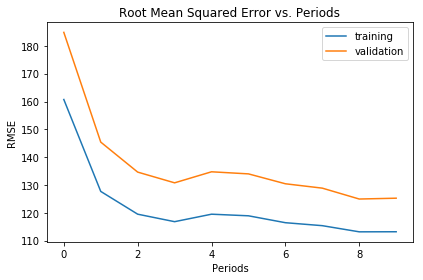

In [10]:
minimal_features = [
    "median_income",
    "latitude"
]
assert minimal_features, "You must select at least one feature!"

minimal_training_examples = training_examples[minimal_features]
minimal_validation_examples = validation_examples[minimal_features]

train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    validation_examples=minimal_validation_examples,
    validation_targets=validation_targets)

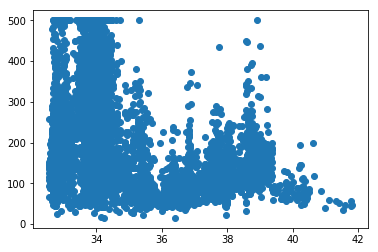

In [11]:
plt.scatter(training_examples["latitude"], training_targets["median_house_value"])

In [13]:
def select_and_transform_features(source_feature):
    LATITUDE_RANGES = zip(range(32, 44), range(33, 45))
    selected_examples = pd.DataFrame()
    selected_examples["median_income"] = source_feature["median_income"]
    for r in LATITUDE_RANGES:
        selected_examples["latitude_%d_to%d" % r] = source_feature["latitude"].apply(
            lambda l: 1.0 if l > r[0] and l < r[1] else 0.0)
    return selected_examples

selected_training_examples = select_and_transform_features(training_examples)
selected_validation_examples = select_and_transform_features(validation_examples)

In [16]:
def select_features(source_feature):
    selected_examples = pd.DataFrame()
    selected_examples["median_income"] = source_feature["median_income"]
    selected_examples["distance_from_san_francisco"] = np.absolute(
        source_feature["latitude"] - 38)
    return selected_examples

my_training_examples = select_features(training_examples)
my_validation_examples = select_features(validation_examples)

**1.)** When using **bucketed method** the model converges slower but remains accurate for both training data and validation data

Training model...
RMSE (on training data):
  period 00 : 198.43
  period 01 : 170.07
  period 02 : 143.25
  period 03 : 121.66
  period 04 : 104.50
  period 05 : 93.93
  period 06 : 86.95
  period 07 : 86.88
  period 08 : 84.93
  period 09 : 83.21
Model training finished.


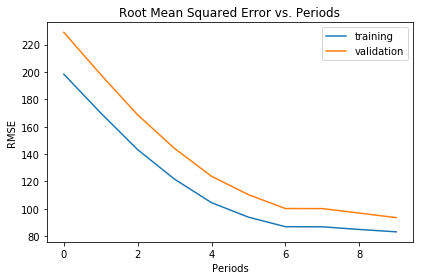

In [15]:
_ = train_model(
    learning_rate=0.03,
    steps=500,
    batch_size=5,
    training_examples=selected_training_examples,
    training_targets=training_targets,
    validation_examples=selected_validation_examples,
    validation_targets=validation_targets)

**2.)** When making a **synthetic feature** out of a selected feature the model takes less training time but **does not remain accurate** for validation data

Training model...
RMSE (on training data):
  period 00 : 190.58
  period 01 : 155.06
  period 02 : 124.14
  period 03 : 102.64
  period 04 : 92.21
  period 05 : 86.37
  period 06 : 84.05
  period 07 : 86.08
  period 08 : 83.23
  period 09 : 82.13
Model training finished.


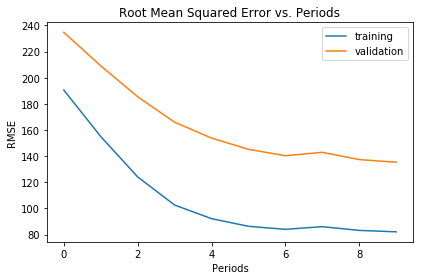

In [17]:
_ = train_model(
    learning_rate=0.03,
    steps=500,
    batch_size=5,
    training_examples=my_training_examples,
    training_targets=training_targets,
    validation_examples=my_validation_examples,
    validation_targets=validation_targets)